## Import

In [217]:
import random
import pandas as pd
import numpy as np
import os
import cv2

from sklearn import preprocessing
from tensorflow.keras import models, layers, Model, regularizers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Permute, Conv3D, MaxPooling3D
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.layers import Flatten, Dense, Dropout, ZeroPadding2D 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import EfficientNetB4, EfficientNetB6, ResNet50V2, EfficientNetB0
#from keras_tuner.tuners import RandomSearch
from tensorflow.keras.utils import Sequence ,to_categorical

import albumentations as A

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

import warnings

# Make DataSet

In [218]:
df = pd.read_csv('./open/train.csv')

In [219]:
df

,id,path,label
0,TRAIN_000,./train/TRAIN_000.mp4,3
1,TRAIN_001,./train/TRAIN_001.mp4,0
2,TRAIN_002,./train/TRAIN_002.mp4,1
3,TRAIN_003,./train/TRAIN_003.mp4,4
4,TRAIN_004,./train/TRAIN_004.mp4,4
...,...,...,...
605,TRAIN_605,./train/TRAIN_605.mp4,0
606,TRAIN_606,./train/TRAIN_606.mp4,2
607,TRAIN_607,./train/TRAIN_607.mp4,1
608,TRAIN_608,./train/TRAIN_608.mp4,4


In [220]:
df.shape

(610, 3)

In [221]:
X_train, X_test, y_train, y_test = train_test_split(df, df['label'].values, test_size = 0.2)

In [222]:
X_train

,id,path,label
465,TRAIN_465,./train/TRAIN_465.mp4,2
541,TRAIN_541,./train/TRAIN_541.mp4,2
426,TRAIN_426,./train/TRAIN_426.mp4,2
286,TRAIN_286,./train/TRAIN_286.mp4,4
409,TRAIN_409,./train/TRAIN_409.mp4,3
...,...,...,...
98,TRAIN_098,./train/TRAIN_098.mp4,2
250,TRAIN_250,./train/TRAIN_250.mp4,3
484,TRAIN_484,./train/TRAIN_484.mp4,3
227,TRAIN_227,./train/TRAIN_227.mp4,1


In [223]:
X_train = X_train.sort_values(by=['id'])

In [224]:
X_train

,id,path,label
0,TRAIN_000,./train/TRAIN_000.mp4,3
2,TRAIN_002,./train/TRAIN_002.mp4,1
5,TRAIN_005,./train/TRAIN_005.mp4,0
6,TRAIN_006,./train/TRAIN_006.mp4,4
7,TRAIN_007,./train/TRAIN_007.mp4,0
...,...,...,...
603,TRAIN_603,./train/TRAIN_603.mp4,4
604,TRAIN_604,./train/TRAIN_604.mp4,0
605,TRAIN_605,./train/TRAIN_605.mp4,0
606,TRAIN_606,./train/TRAIN_606.mp4,2


In [225]:
X_train['id'] = [path[6:] for path in X_train['id']]

In [226]:
X_train

,id,path,label
0,000,./train/TRAIN_000.mp4,3
2,002,./train/TRAIN_002.mp4,1
5,005,./train/TRAIN_005.mp4,0
6,006,./train/TRAIN_006.mp4,4
7,007,./train/TRAIN_007.mp4,0
...,...,...,...
603,603,./train/TRAIN_603.mp4,4
604,604,./train/TRAIN_604.mp4,0
605,605,./train/TRAIN_605.mp4,0
606,606,./train/TRAIN_606.mp4,2


In [227]:
X_train['path'] = ['D:/ML/Handpose/open/' + path[2:] for path in X_train['path']]

In [228]:
X_train

,id,path,label
0,000,D:/ML/Handpose/open/train/TRAIN_000.mp4,3
2,002,D:/ML/Handpose/open/train/TRAIN_002.mp4,1
5,005,D:/ML/Handpose/open/train/TRAIN_005.mp4,0
6,006,D:/ML/Handpose/open/train/TRAIN_006.mp4,4
7,007,D:/ML/Handpose/open/train/TRAIN_007.mp4,0
...,...,...,...
603,603,D:/ML/Handpose/open/train/TRAIN_603.mp4,4
604,604,D:/ML/Handpose/open/train/TRAIN_604.mp4,0
605,605,D:/ML/Handpose/open/train/TRAIN_605.mp4,0
606,606,D:/ML/Handpose/open/train/TRAIN_606.mp4,2


In [229]:
X_test = X_test.sort_values(by=['id'])

In [230]:
X_test['id'] = [path[6:] for path in X_test['id']]

In [231]:
X_test['path'] = ['D:/ML/Handpose/open/' + path[2:] for path in X_test['path']]

In [232]:
X_test

,id,path,label
1,001,D:/ML/Handpose/open/train/TRAIN_001.mp4,0
3,003,D:/ML/Handpose/open/train/TRAIN_003.mp4,4
4,004,D:/ML/Handpose/open/train/TRAIN_004.mp4,4
12,012,D:/ML/Handpose/open/train/TRAIN_012.mp4,2
18,018,D:/ML/Handpose/open/train/TRAIN_018.mp4,0
...,...,...,...
595,595,D:/ML/Handpose/open/train/TRAIN_595.mp4,1
596,596,D:/ML/Handpose/open/train/TRAIN_596.mp4,1
600,600,D:/ML/Handpose/open/train/TRAIN_600.mp4,3
607,607,D:/ML/Handpose/open/train/TRAIN_607.mp4,1


In [233]:
class CustomDataset(Sequence):
    def __init__(self, x_set, y_set, batch_size, augmentations, shuffle = True):
        self.y = y_set
        self.x = x_set
        self.batch_size = batch_size
        self.augment = augmentations
        self.indexes = np.arange(self.x.shape[0])
        self.shuffle = shuffle
        self.on_epoch_end()
    def on_epoch_end(self):
        'Updates indexes after each epoch'
        if self.shuffle == True:
            np.random.shuffle(self.indexes)
    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))
    def get_Video(self, path):
        frames = []
        cap = cv2.VideoCapture(path)
        for _ in range(30):
            _, img = cap.read()
            img = np.array(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            #img = np.array(cv2.COLOR_BGR2RGB(img))
            img = self.augment(image = img)["image"]
            frames.append(img)
        return np.array(frames)

    # 지정 배치 크기만큼 데이터를 로드합니다.
    def __getitem__(self, idx):
        inds = self.indexes[idx * self.batch_size:(idx + 1) * self.batch_size]
        img_path = self.x[inds]
        batch_x = [self.get_Video(x)for x in img_path]
        batch_y = self.y[inds]
        
        # augmentation을 적용해서 numpy array에 stack합니다.
        return np.array(batch_x), np.array(batch_y)

In [234]:
train_transform = A.Compose([A.Resize(128,128),
                             #A.HorizontalFlip(p=0.5), A.VerticalFlip(p=0.5), A.Rotate(limit= 90),
                             A.Normalize(mean=(0.485, 0.456, 0.406), 
                            std=(0.229, 0.224, 0.225),
                            max_pixel_value=255.0, always_apply=False, p=1.0)])
test_transform = A.Compose([A.Resize(128,128),A.Normalize(mean=(0.485, 0.456, 0.406),
                            std=(0.229, 0.224, 0.225), max_pixel_value=255.0, always_apply=False, p=1.0)])

In [235]:
def get_data(df, infer = False):
    if infer:
        return df['path'].values, df['id'].values
    return df['path'].values, df['label'].values

In [236]:
train_x, train_y = get_data(X_train)
test_x, test_y = get_data(X_test)

In [237]:
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [238]:
train_y.shape

(488, 5)

In [239]:
frames = []
cap = cv2.VideoCapture(train_x[0])
for _ in range(30):
    _, img = cap.read()
    img = np.array(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    img = train_transform(image = img)["image"]
    #img = np.array(cv2.COLOR_BGR2RGB(img))
    frames.append(img)

In [240]:
frame = np.array(frames)
frame.shape

(30, 128, 128, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


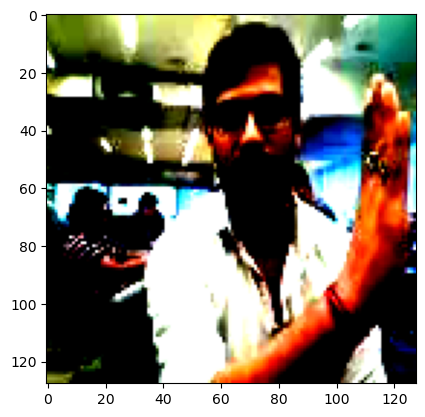

In [241]:
import matplotlib.pyplot as plt
plt.imshow(frame[0])

In [242]:
train_dataset = CustomDataset(train_x, train_y, 16, train_transform)
test_dataset = CustomDataset(test_x, test_y, 16, train_transform)

# Make Model

In [275]:
model = Sequential()
#model.add(Permute((4, 1, 2, 3), input_shape = (30, 128, 128, 3)))
model.add(Conv3D(8, (3, 3, 3),  activation='relu',input_shape = (30, 128, 128, 3)))
model.add(BatchNormalization())
model.add(MaxPooling3D(2))
model.add(Conv3D(32, (2, 2, 2),  activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling3D(2))
model.add(Conv3D(64, (2, 2, 2), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling3D(2))
model.add(Conv3D(128, (2, 2, 2), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling3D((1, 7, 7)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
#model.add(Dense(64, activation='relu'))
#model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [276]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [277]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_49 (Conv3D)          (None, 28, 126, 126, 8)   656       
                                                                 
 batch_normalization_49 (Bat  (None, 28, 126, 126, 8)  32        
 chNormalization)                                                
                                                                 
 max_pooling3d_49 (MaxPoolin  (None, 14, 63, 63, 8)    0         
 g3D)                                                            
                                                                 
 conv3d_50 (Conv3D)          (None, 13, 62, 62, 32)    2080      
                                                                 
 batch_normalization_50 (Bat  (None, 13, 62, 62, 32)   128       
 chNormalization)                                                
                                                     

In [273]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8256214455915429472
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 22722641920
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14034451665088931308
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [268]:
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint('D:/ML/Handpose/open/model.h5', save_best_only=True, monitor='val_accuracy', mode='max',save_weights_only=True)
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

In [248]:
history = model.fit(train_dataset, epochs= 100, validation_data=test_dataset,
                    callbacks=[earlyStopping, mcp_save, reduce_lr_loss])

Epoch 1/100
31/31 [==============================] - 11s 340ms/step - loss: 2.2114 - accuracy: 0.2234 - val_loss: 1.5272 - val_accuracy: 0.2705 - lr: 0.0010
Epoch 2/100
31/31 [==============================] - 10s 332ms/step - loss: 1.2062 - accuracy: 0.4611 - val_loss: 1.3586 - val_accuracy: 0.5164 - lr: 0.0010
Epoch 3/100
31/31 [==============================] - 10s 328ms/step - loss: 1.0188 - accuracy: 0.5799 - val_loss: 1.3534 - val_accuracy: 0.4426 - lr: 0.0010
Epoch 4/100
31/31 [==============================] - 10s 330ms/step - loss: 0.8576 - accuracy: 0.6414 - val_loss: 1.3378 - val_accuracy: 0.4262 - lr: 0.0010
Epoch 5/100
31/31 [==============================] - 10s 328ms/step - loss: 0.6394 - accuracy: 0.7602 - val_loss: 1.3687 - val_accuracy: 0.4016 - lr: 0.0010
Epoch 6/100
31/31 [==============================] - 10s 334ms/step - loss: 0.4584 - accuracy: 0.8361 - val_loss: 1.1416 - val_accuracy: 0.5574 - lr: 0.0010
Epoch 7/100
31/31 [==============================] - 10s 3

In [278]:
model.load_weights(filepath = 'D:/ML/Handpose/model.h5')

In [279]:
scores = model.evaluate_generator(test_dataset, verbose=0)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

C:\Users\DELL\AppData\Local\Temp\ipykernel_34236\387940907.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_dataset, verbose=0)


accuracy: 95.08%


In [280]:
result = pd.read_csv('./open/test.csv')

In [281]:
result

,id,path
0,TEST_000,./test/TEST_000.mp4
1,TEST_001,./test/TEST_001.mp4
2,TEST_002,./test/TEST_002.mp4
3,TEST_003,./test/TEST_003.mp4
4,TEST_004,./test/TEST_004.mp4
...,...,...
148,TEST_148,./test/TEST_148.mp4
149,TEST_149,./test/TEST_149.mp4
150,TEST_150,./test/TEST_150.mp4
151,TEST_151,./test/TEST_151.mp4


In [282]:
result['path'] = ['D:/ML/Handpose/open/' + path[2:] for path in result['path']]

In [283]:
result_path, result_y = get_data(result, infer=True)

In [284]:
result_Gen = CustomDataset(result_path, result_y, 16, test_transform, shuffle=False)

In [285]:
Test_Predic = model.predict(result_Gen)

10/10 [==============================] - 3s 269ms/step


In [286]:
Test_Predic.shape

(153, 5)

In [287]:
Test_Predic = np.argmax(Test_Predic, axis = 1)
Test_Predic

array([1, 3, 0, 2, 4, 0, 4, 3, 0, 0, 2, 0, 0, 4, 1, 0, 3, 1, 0, 1, 2, 2,
       2, 3, 2, 3, 1, 4, 4, 0, 3, 1, 1, 4, 3, 4, 2, 3, 2, 0, 2, 3, 4, 3,
       3, 4, 4, 0, 4, 1, 3, 0, 1, 0, 1, 3, 1, 2, 0, 4, 0, 3, 4, 2, 4, 2,
       1, 0, 2, 4, 3, 1, 3, 3, 3, 0, 0, 4, 3, 0, 0, 3, 2, 1, 3, 2, 4, 3,
       0, 2, 1, 2, 2, 0, 2, 1, 4, 0, 2, 3, 2, 4, 1, 4, 1, 2, 0, 0, 3, 1,
       0, 1, 4, 3, 1, 1, 0, 1, 1, 3, 1, 3, 1, 1, 3, 4, 0, 2, 1, 0, 0, 1,
       4, 2, 4, 0, 0, 3, 2, 0, 0, 0, 0, 1, 3, 1, 2, 2, 2, 0, 0, 1, 2],
      dtype=int64)

In [288]:
submit = pd.read_csv("./open/sample_submission.csv")

In [289]:
submit

,id,label
0,TEST_000,0
1,TEST_001,0
2,TEST_002,0
3,TEST_003,0
4,TEST_004,0
...,...,...
148,TEST_148,0
149,TEST_149,0
150,TEST_150,0
151,TEST_151,0


In [290]:
submit['label'] = Test_Predic

In [291]:
submit.to_csv('./submit.csv', index=False)